# CPSC 330 hw3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from plot_classifier import plot_classifier

## Instructions
rubric={points:5}

Follow the [homework submission instructions](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/docs/homework_instructions.md). 

**NEW REQUIREMENT**: if you are working with a partner, you must write a few sentences explaining the contribution of each team member. You should refer to yourselves by your CSIDs (because seeing names can cause bias during grading). Here is an example:

> a1b2c did Exercise 1, checked over Exercise 2, and pair-programmed for Exercise 3. z9y8x checked over Exercise 1, did Exercise 2, and pair-programmed for Exercise 3. 

Our ideal scenario is that you worked together on all the exercises, but you are not required to do so, and for now we are only collecting this information because we are curious. If you are working alone, you can ignore this section.

> x8p1b did everything, b9h0b also did everything. Then we checked our answers together and dicussed.


# Exercise 1: Data and preprocessing <a name="1"></a>
We will be focusing on the classification task of predicting the presence or absence of heart disease (the response) based on a set of 13 different biophysical measures (the features). The classification of heart disease in patients is obviously of great importance for cardiovascular disease diagnosis and prevention. Machine learning offers novel and potentially effective methods of forming predictive models from heart disease data. The dataset you will be working with has been made available by the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). A slightly modified version of this dataset has been made available in your repo as `heart_disease.csv`. You will see that it contains 303 observations (patients) and 14 columns (13 features and 1 response).



In [3]:
heart_df = pd.read_csv('heart_disease.csv', index_col=0)
heart_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
patient_id,,,,,,,,,,,,,,
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,abnormal,187,no,3.5,upsloping,0,normal,1
2,41,female,non-anginal pain,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,non-anginal pain,120,236,lower than 120mg/ml,abnormal,178,no,0.8,downsloping,0,normal,1
4,57,female,angina,120,354,lower than 120mg/ml,abnormal,163,yes,0.6,downsloping,0,normal,1


Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary.

### 1.1 Ordering the steps
rubric={points:5}

Your first task is to wrangle this dataset into a format suitable for use with the `scikit-learn` library. This includes:

1. Loading the dataset;
2. Feature preprocessing (one-hot encoding and scaling); and,
3. Splitting data into train/validation/test sets.

To help you understand this wrangling process, the code required to perform the pre-processing tasks above is provided. The code has been arranged into different blocks performing the tasks above but these blocks are in the wrong order. Rearrange the code to correctly wrangle the data and add a short comment to each block to describe what the code is doing.

In [35]:
# load the dataset
heart_df = pd.read_csv('heart_disease.csv', index_col=0)

# get features/X from the dataset
numeric_features = ['age', 'resting_blood_pressure', 'cholesterol',
                    'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                        'exercise_induced_angina', 'st_slope', 'thalassemia']

# obe-hot encoding and Standard scaling for categorical and numeric values respectively
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numeric_features),
        ('ohe', OneHotEncoder(drop="first"), categorical_features)])

# splitting the entire heart_df to 90% training set and 10% testing set
X_train, X_test, y_train, y_test = train_test_split(heart_df.drop(columns='target'),
                                                    heart_df['target'],
                                                    test_size=0.1,
                                                    random_state=50)

# splitting the training dataset into 20% validation set and 80% training dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                      y_train,
                                                      test_size=0.2,
                                                      random_state=50)

# transforming training set data and convert it to a data frame
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
                       index=X_train.index,
                       columns=(numeric_features +
                                list(preprocessor.named_transformers_['ohe']
                                     .get_feature_names(categorical_features))))

# Use the same transformation on validation set and convert it to a data frame
X_valid = pd.DataFrame(preprocessor.transform(X_valid),
                      index=X_valid.index,
                      columns=X_train.columns)

# Use the same transformation on validation set and convert it to a data frame
X_test = pd.DataFrame(preprocessor.transform(X_test),
                      index=X_test.index,
                      columns=X_train.columns)


In [5]:
X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_non-anginal pain,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal
patient_id,,,,,,,,,,,,,,
226,0.885344,-0.609894,0.632352,-2.155273,0.310458,0.287021,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
283,-1.483844,1.222692,-0.459387,1.389931,-0.886459,-0.686161,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110,1.100725,2.826205,1.460568,0.162745,-0.886459,-0.686161,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
203,1.531486,2.826205,0.500590,-0.019060,0.481446,-0.686161,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
58,-2.129987,-0.724431,-1.231134,1.071772,-0.886459,-0.686161,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


### 1.2 Exploring the one-hot encoding
rubric={points:3}

The original dataset had a feature called `st_slope`. 

1. What were the possible values of this feature? 
2. What new binary feature(s) were created to replace this feature? 
3. For each possible value of the original feature, how is this value represented in the transformed data? For example, the original feature `rest_ecg` had two values, "normal" and "abnormal". In the transformed data, the new feature is called `rest_ecg_normal`, where "normal" is represented as 1.0 and "abnormal" is represented as 0.0.

In [6]:
# 1. possible values in st_slope
np.array2string(heart_df["st_slope"].unique())
print("1. " + "The possible values in st_slopes were: " + np.array2string(heart_df["st_slope"].unique()))

1. The possible values in st_slopes were: ['upsloping' 'downsloping' 'flat']


2. 2 columns: st_upsloping, and st_flat

3.  st_slope_flat represents a flat slope as a 1. A second feature called st_slope_upsloping is used to represent the other two categories: downsloping as 0 and upsloping as 1

## TODO: COPY Ahmed's answer!

## Exercise 2: Logistic regression <a name="2"></a>
In this exercise you will work with a type of linear model known as *logistic regression*. Recall that logistic regression, despite the name, is used for classification tasks. Typically it is used to model the relationship between one dependent binary variable (the target) and one or more numerical or categorical independent variables (features). 

### 2.1 Train a logistic regression model
rubric={points:1}

Fit a [Logistic Regression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) called `lgr` on the train split of the heart disease data. You can use all default hyperparameters. If you get a `FutureWarning`, you can ignore it.

In [15]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
# show_scores(lgr, X_train, y_train, X_valid, y_valid)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 2.2 Test the model
rubric={points:2}

1. Test the `lgr` model on the training split of the heart disease data.
2. Test the `lgr` model on the validation split of the heart disease data.

In [16]:
print("The mean accuracy of lgr model on training set is {}, and on the validation set is {}"
      .format(lgr.score(X_train, y_train) ,lgr.score(X_valid,y_valid)))

The mean accuracy of lgr model on training set is 0.8387096774193549, and on the validation set is 0.8363636363636363


### 2.3 Interpret the test outputs
rubric={points:1}

Based on your results from **Q2.2** would you say your logisitic regression model is overfit? Why/why not?

I don't think so. Normally if the model is overfitting, then there should be a large discrepancy between the training data accuracy and the validation data accuracy. The model we tested now had really similar mean testing accuracy.

### 2.4 Predicting probabilities
rubric={points:6}

A logistic regression model outputs a probability between 0 and 1, where (typically) probabilities less than 0.5 are assigned to class 0 and probabilites greater than 0.5 are assigned to class 1. The predictions of the logistic regression model can be revealed through the `.predict_proba()` method.

1. What is the predicted probability that the first observation in the validation set (observation 11) has heart disease (target = 1)?
1. What is the largest predicted probability across the entire validation set?
1. What is the ID of the patient with this highest predicted probability of heart disease in the validation set (give the actual ID number, not the index location)?

In [17]:
print("1. " + "the probability of first obervation has heart disease is {}".format(lgr.predict_proba(X_valid[:1])[:,1]))
print("2." + "the largest predicted probablity is {}".format(lgr.predict_proba(X_valid)[:,1].max()))
print("3." +" the pateint ID is {}".format(X_valid.iloc[np.argmax(lgr.predict_proba(X_valid)[:,1])].name))

1. the probability of first obervation has heart disease is [0.74909087]
2.the largest predicted probablity is 0.9830029991189507
3. the pateint ID is 115


### 2.5 Most important features for predicting heart disease
rubric={points:5}

We can investigate the coefficient values of our logistic regression model to help understand the importance of the different features. Information of the coefficients is exposed by the `coef_` attribute of your `lgr` model (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more help). What are the 3 most important features in the model according to the absolute value of the coefficients?

What is the difference between a positive and negative coefficient in your `lgr` model?

In [18]:
lgr.coef_
features = X_train.columns
weights = lgr.coef_.ravel()
features_weights_df = pd.DataFrame(data=weights, index=features, columns=['Weight']).abs()
most_impact_fea = np.array2string(features_weights_df.sort_values(by = "Weight", ascending = False)[:3].index.values)
print("The 3 most important features are: " + most_impact_fea)

print("A positive coefficient means that the corresponding feature will more likely correlate to heart disease, a negative coefficient means the opposite")

The 3 most important features are: ['chest_pain_type_non-anginal pain' 'thalassemia_normal' 'sex_male']
A positive coefficient means that the corresponding feature will more likely correlate to heart disease, a negative coefficient means the opposite


## Exercise 3: Support vector machine (SVM) <a name="3"></a>

In this exercise, you will use train a SVM on the heart disease dataset and compare results to the logistic regression model from **Exercise 2**. 

### 3.1 Kernels in SVM classification
rubric={points:5}

The sklearn [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) allows several different values for its `kernel` argument, including `'linear'`, `'poly'`, and `'rbf'`. For each of these kernels, train a model and report the training and validation accuracy. Make sure you use a `for` loop instead of repeating your code 3 times. To avoid issues with the newer sklearn, set `gamma='auto'`.

In [19]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    svm = SVC(kernel= kernel, gamma = "auto")
    svm.fit(X_train,y_train)
    print(kernel + " " + "SVM Training accuracy:   %.2f" % (svm.score(X_train, y_train)))
    print(kernel + " " + "SVM Validation accuracy:   %.2f" % (svm.score(X_valid, y_valid)))

linear SVM Training accuracy:   0.85
linear SVM Validation accuracy:   0.85
poly SVM Training accuracy:   0.83
poly SVM Validation accuracy:   0.82
rbf SVM Training accuracy:   0.88
rbf SVM Validation accuracy:   0.85


### 3.2 Interpreting results
rubric={points:3}

How do the train and validation accuracies compare to the logistic regression classifier in **Exercise 2**? Are any of the models overfit? Based on your results, why do you think the `'rbf'` kernel is the default in `scikit-learn`?

The accuracies are similar to those of the logistic regression classifier. None of the models seem to be overfitting for this dataset.

I think because the training and validation accuracy are exactly the same, meaing that the approximation error is minimized. Therefore, it will most likely give us the most accurate representation of how well our model will do on the real test prediction based on our training dataset.

### 3.3 Visualizing results
rubric={points:3}

To understand the effect of the different `SVC` kernels it may be helpful to visualize them. We can easily visualize decision boundaries in 2-dimensions (i.e., 2 input features). The code below visualizes the 3 different kernels you tried above using a subset of the training data with only 2 features and only 30% of the examples. Run the code and *briefly* comment on/describe the behaviour of the three different kernels.

In [20]:
# Extract some sample 2-d data, set the random_state for repeatability and matching X/y samples
sample = (X_train[['age', 'cholesterol']].join(y_train)
                                         .sample(frac=0.3, random_state=123)
                                         .dropna())
sample_X, sample_y = sample.drop(columns="target"), sample["target"]

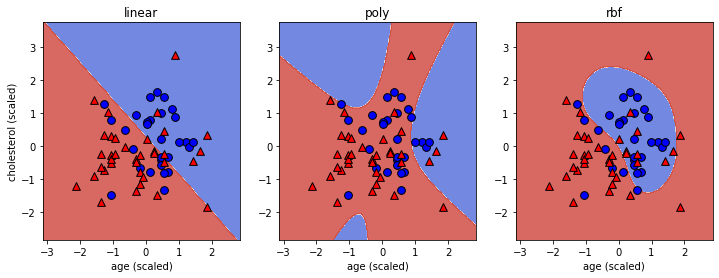

In [21]:
plt.figure(figsize=(12,4))
for i, kernel in enumerate(kernels):
    SVC_model = SVC(kernel=kernel, gamma="auto")
    SVC_model.fit(sample_X, sample_y)
    plt.subplot(1,3,i+1)
    ax = plt.gca()
    plot_classifier(sample_X, sample_y, SVC_model, ax=ax, ticks=True)
    ax.set_title(kernel);
    ax.set_xlabel('age (scaled)')
    if i == 0:
        ax.set_ylabel('cholesterol (scaled)')

- linear kernel: the decision boundary used to classify examples is a line that splits 2d space into two halves <br />
- poly kernel: the decision boundary does not follow a straight line to split space, but rather a polynomial<br />
- rbf kernel: The decision boundary is complex and highly adapts to the 2d shape of the dataset when making a split<br />

### 3.4 The RBF kernel hyperparameters
rubric={points:5}

`gamma` and `C` are hyperparameters of the `SVC` model, specifically for the RBF kernel. Both of them affect the complexity of the model. In this exercise we'll focus `gamma` specifically.

Your task is to explore different values of `gamma`: 

1. Set `gamma` to $0.001, 0.01, 0.1, 1$ and $10$, once again using a `for` loop instead of repeating your code. Inside the loop, fit the model on the original training data and report the training and validation accuracy. 
2. Furthermore, for each `gamma`, fit another `SVC` model on only the smaller dataset from the previous exercise, and produce a decision boundary plot similar to the ones above. 
3. Then, discuss your results. How does `gamma` influence your results? Can you relate this to the fundamental trade-off of ML models? Do you get more complicated surfaces from larger `gamma`, or smaller?

Note: your accuracy printouts won't correspond exactly to the plots, because the accuracy scores come from the full dataset and the plots are only made using the subsetted data.

In [22]:
# 1. gamma tuning
gammas = [0.001,0.01,0.1, 1, 10]
for gamma in gammas:
    svm = SVC(kernel = 'rbf',gamma = gamma)
    svm.fit(X_train,y_train)
    print("Performance of gamma = {} is: ".format(gamma))
    print("SVM Training accuracy:   %.2f" % (svm.score(X_train, y_train)))
    print("SVM Validation accuracy:   %.2f" % (svm.score(X_valid, y_valid)))
    print("")


Performance of gamma = 0.001 is: 
SVM Training accuracy:   0.68
SVM Validation accuracy:   0.71

Performance of gamma = 0.01 is: 
SVM Training accuracy:   0.84
SVM Validation accuracy:   0.87

Performance of gamma = 0.1 is: 
SVM Training accuracy:   0.89
SVM Validation accuracy:   0.89

Performance of gamma = 1 is: 
SVM Training accuracy:   1.00
SVM Validation accuracy:   0.76

Performance of gamma = 10 is: 
SVM Training accuracy:   1.00
SVM Validation accuracy:   0.58



Performance of the rbf svc model with gamma = 0.001 is: 0.5538461538461539
Performance of the rbf svc model with gamma = 0.01 is: 0.5538461538461539
Performance of the rbf svc model with gamma = 0.1 is: 0.6615384615384615
Performance of the rbf svc model with gamma = 1 is: 0.7692307692307693
Performance of the rbf svc model with gamma = 10 is: 0.9076923076923077


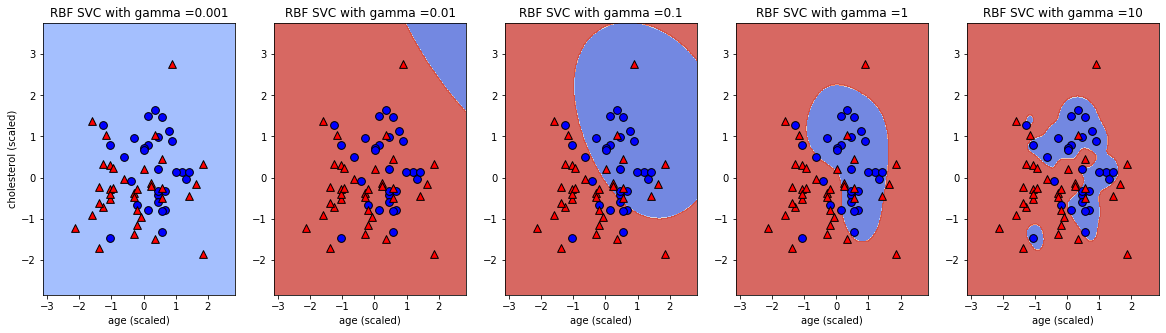

In [150]:
# 2. fit for "rbf" for each gammas
plt.figure(figsize=(20,len(gammas)))
for i, gamma in enumerate(gammas):
    SVC_model = SVC(kernel="rbf", gamma=gamma)
    SVC_model.fit(sample_X, sample_y)
    print("Performance of the rbf svc model with gamma = {} is: {}".format(gamma, SVC_model.score(sample_X, sample_y)))
    plt.subplot(1,len(gammas),i+1)
    ax = plt.gca()
    plot_classifier(sample_X, sample_y, SVC_model, ax=ax, ticks=True)
    ax.set_title("RBF SVC with gamma =" + str(gamma));
    ax.set_xlabel('age (scaled)')
    if i == 0:
        ax.set_ylabel('cholesterol (scaled)')

Based on the results above, increasing the value of gamma leads to a more complex model with decision boundaries that fit more to the training data. Beyond gamma = 0.1 the model starts to overfit, where training accuracy is very high but validation accuracy on new examples starts dropping

## Exercise 4: Open-Ended <a name="4"></a>

### 4.1 Try to maximize valdiation accuracy
rubric={points:6}

Using any of `LogisticRegression`, `SVC`, `DecisionTreeClassifier` and `RandomForestClassifier`, try to get the best validation accuracy that you can on this same data set. You'll want to fiddle with the hyperparameters. When you are done, briefly describe what you tried and what worked best.

Note: this question is quite open-ended. I recommend not spending more than 20 minutes on it, and just submitting what you have after 20 min. 

#### Will play with the hyperparameter max_features and max_depth using the RandomForestClassifier model.

In [38]:
models = []
scores = []
svm = SVC(kernel="rbf", gamma = 0.1, C = 1.0, random_state = 100)
lgr = LogisticRegression(C = 0.1, random_state = 100)
dt = DecisionTreeClassifier(max_depth=7, random_state = 100)
rf = RandomForestClassifier(n_estimators = 70, max_features = 4, max_depth = 2, random_state = 100)
models.extend((svm, lgr, dt, rf))

for model in models:
    model.fit(X_train, y_train)
    scores.append("%.3f" %(model.score(X_valid, y_valid)))
    
i = ['svm', 'lgr', 'dt', 'rf']
d = {'Validation accuracy': scores}
df = pd.DataFrame(d, i)
df

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Validation accuracy
svm,0.891
lgr,0.891
dt,0.836
rf,0.909


##### Optimizing one hyperparameter does not mean it is also optimized to use when tuning for another hyperparameter?


For the svm classifier: modified both 'C' and 'gamma' until an accuracy of 89.1% was reached. Changing gamma seemed to be a more effective strategy when C was kept constant <br />

lgr classifier: Used different values of 'C' in multiples of 10, settled for C = 0.1 for an accuracy of 89.1%

decision tree: Used different values for max depth between 4 and 10. A maximum depth of 7 proved reasonable

random forest: Got the highest validation accuracy using this model, around 91%. This was achieved using a combination of number of estimators, maximum number of features considered for each split and max depth of 2 to reduce overfitting

### 4.2 Test set
rubric={points:3}

Evaluate your final model on the test set. How does your test accuracy compare to your validation accuracy? If they are different: do you think this is because you "overfitted on the validation set", or simply random luck? Discuss your answer in the context of the size of the data set.

In [39]:
# Accuracy of the random forest model when applied to test data
rf.score(X_test, y_test)

0.8709677419354839

There is a small difference between the prediction accuracies of the test and validation data of about 3%. This could be random luck, as the size of the test dataset is much smaller than the training dataset. Perhaps all those test examples fell within the bounds of training examples and the model was able to make a good prediction based on that. On a larger test dataset we may not see such high accuracies

### 4.3 Cross-validation
rubric={points:1}

Would this problem be a good candidate for using cross-validation, instead of a train/validation split? Briefly justify your answer.

Yes, this will add some randomness to the training phase and will allow us to capture more information given the small dataset we have.